<a href="https://colab.research.google.com/github/catebarry/xai-assignments/blob/main/assignments/assignment-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment 1: Interpretable ML
#### We are working with a dataset from a telecommunications company to understand the factors that contribute to customer churn and develop interpretable models to predict which customers are at risk of churning.

### Catie Barry


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/catebarry/xai-assignments/blob/main/assignment-01.ipynb)

In [7]:
# installations

!pip install pandas==1.3.0

  Using cached pandas-1.3.0.tar.gz (4.7 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 2
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 2
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [53]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "xai-assignments" # Change to your repo name
git_path = 'https://github.com/catebarry/xai-assignments.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'assignments'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

rm: cannot remove './sample_data': No such file or directory
Cloning into 'xai-assignments'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 51 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 182.38 KiB | 1.96 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/xai-assignments/assignments/xai-assignments/assignments
assignment-1.ipynb  data/


# Exploratory Data Analysis to Check Assumptions

We begin by exploring the Telco Customer Churn dataset to understand its structure, distributions, and potential issues that might violate regression assumptions.

In this section, we will:
- Load and clean the dataset
- Explore the target variable (`Churn`) and class balance
- Visualize numeric and categorical features
- Identify potential violations of model assumptions:
  - Linearity
  - Independence of observations
  - Homoscedasticity
  - Normality of residuals
  - No multicollinearity
  - No influential outliers

⚠️ Note: Some assumptions (linearity, homoscedasticity, normality, etc) require residuals and will be fully tested later, once we fit regression models.

### 1. Load and Inspect the Dataset

The [Telco Customer Churn dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) contains 7,043 rows (customers) and 21 columns (features + target). It has info such as customer demographics, account information, service usage, billing details, and whether the customer churned (`Churn`).
- **customerID** is a unique identifier (string).  
- Most variables are **categorical (object type)**, such as `gender`, `Contract`, and `PaymentMethod`.  
- A few are **numeric**:  
  - `tenure` (integer, number of months as a customer)  
  - `MonthlyCharges` (float, monthly bill amount)  
  - `TotalCharges` (string, should be numeric but contains some non-numeric blanks)  
- The target variable **Churn** is categorical (`Yes`/`No`).  

➡️ Cleaning steps required:  
- Convert `Churn` to binary (Yes = 1, No = 0).  
- Convert `TotalCharges` to numeric and handle blanks.  


In [39]:
# load dataset
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# inspect
print(f"Dimensions: {df.shape}")

df.info()
df.head()


Dimensions: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. Target Variable and Data Cleaning

- `Churn`: convert Yes → 1, No → 0  
- `TotalCharges`: currently stored as `object` (string), needs conversion to numeric. Some values are blank and will be replaced with the median.  

In [43]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

### 3. Churn Class Balance

We check whether churned vs. non-churned customers are balanced.

➡️ This plot shows a slight **class imbalance**, which is important for modeling: accuracy alone may be misleading if a model just predicts “No churn” most of the time.  

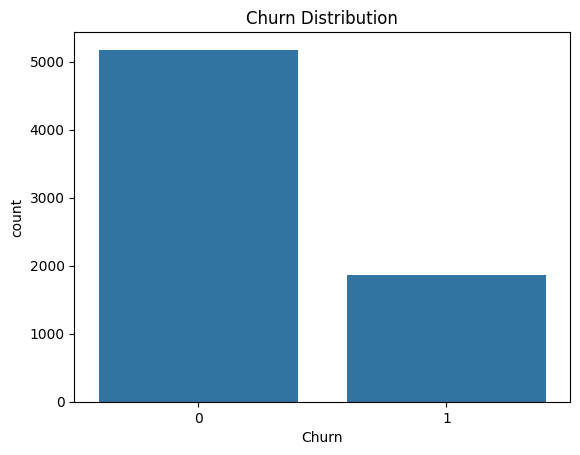

In [29]:
# class balance
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

### 4. Distribution of Numeric Features

We examine `tenure`, `MonthlyCharges`, and `TotalCharges` to check for skewness and potential outliers.

- **tenure**: Many customers are recent (low tenure), with visible spikes at contract renewal points every 12 months. There are also significantly more customers at the extremes: many have either very low (new customers) or very high tenure (old customers).
- **MonthlyCharges**: Fairly evenly spread from low to high, with significant peak at lower end. (Ingorning the peak, monthly charges tend to be left skewed.)  
- **TotalCharges**: Right-skewed — many customers have low total charges (short tenure), while a smaller number have very high totals.  

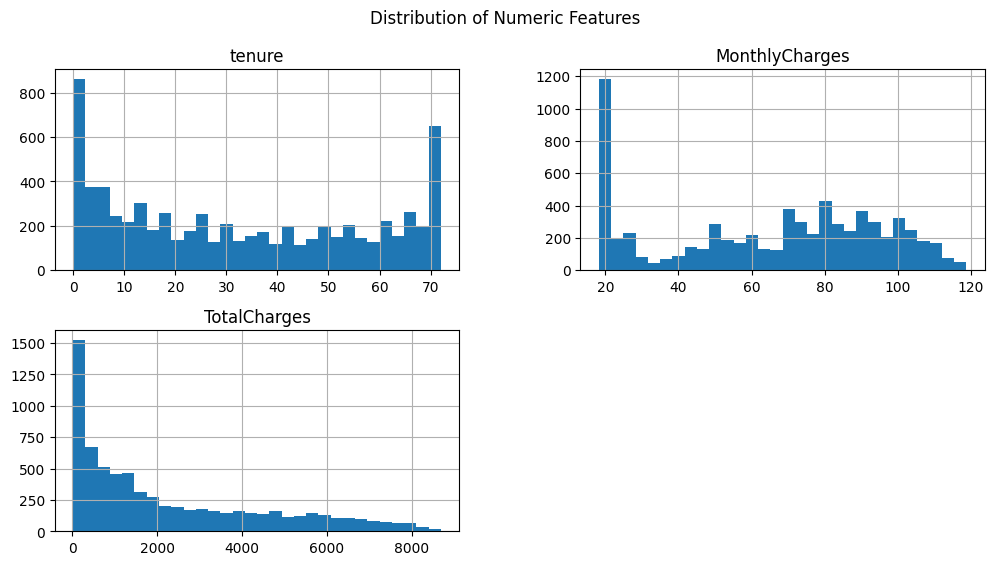

In [30]:
# univariate analysis
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[num_features].hist(bins=30, figsize=(12,6))
plt.suptitle("Distribution of Numeric Features")
plt.show()

### 5. Numeric Features vs. Churn (Linearity Preview)

Boxplots show whether churn differs across numeric features.  
This gives an early view of potential non-linearities.

Interpretation:  
- Customers with short tenure churn more often
  - There appear to be several outliers, where customers with very high tenure churn more often
- Customers with high MonthlyCharges churn more often
- Churned customers have much lower total charges (because they left earlier)
  - There appear to be a signifcant number of outliers, where customers with very high total charges churn more often

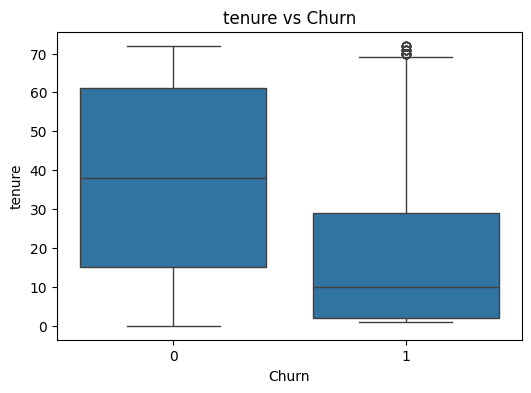

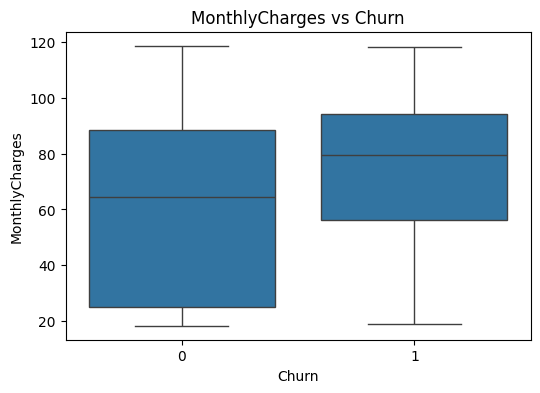

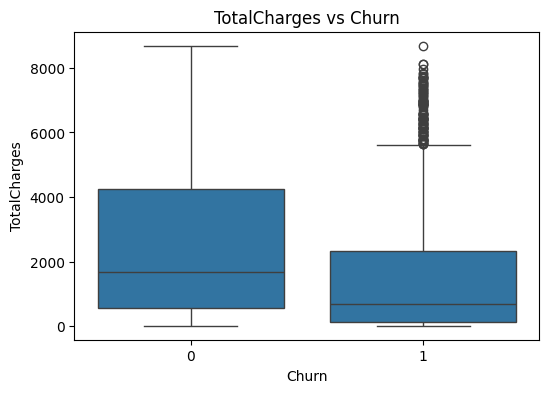

In [19]:
# churn vs numeric features
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

### 6. Categorical Features vs. Churn

We check whether churn varies across demographic and account categories.

Interpretation:
- Partner: customers with partners churn less often
- Dependents: customers with dependents churn less often
- InternetService: fiber optic customers churn more often
- OnlineSecurity: customers with no online secruity churn more often
- OnlineBackup: customers with no online backup churn more often
- DeviceProtection: customers with no device protection churn more often
- TechSupport: customers with no tech support churn more often
- Contract: customers on month-to-month contracts churn much more often
- PaperlessBilling: customers with paperless billing churn more often
- PaymentMethod: electronic check users churn more often
- Other features (including Gender, SeniorCitizen, PhoneService, MultipleLines, StreamingTV, StreamingMovies) appear to have no or little meaningful difference on churn rates

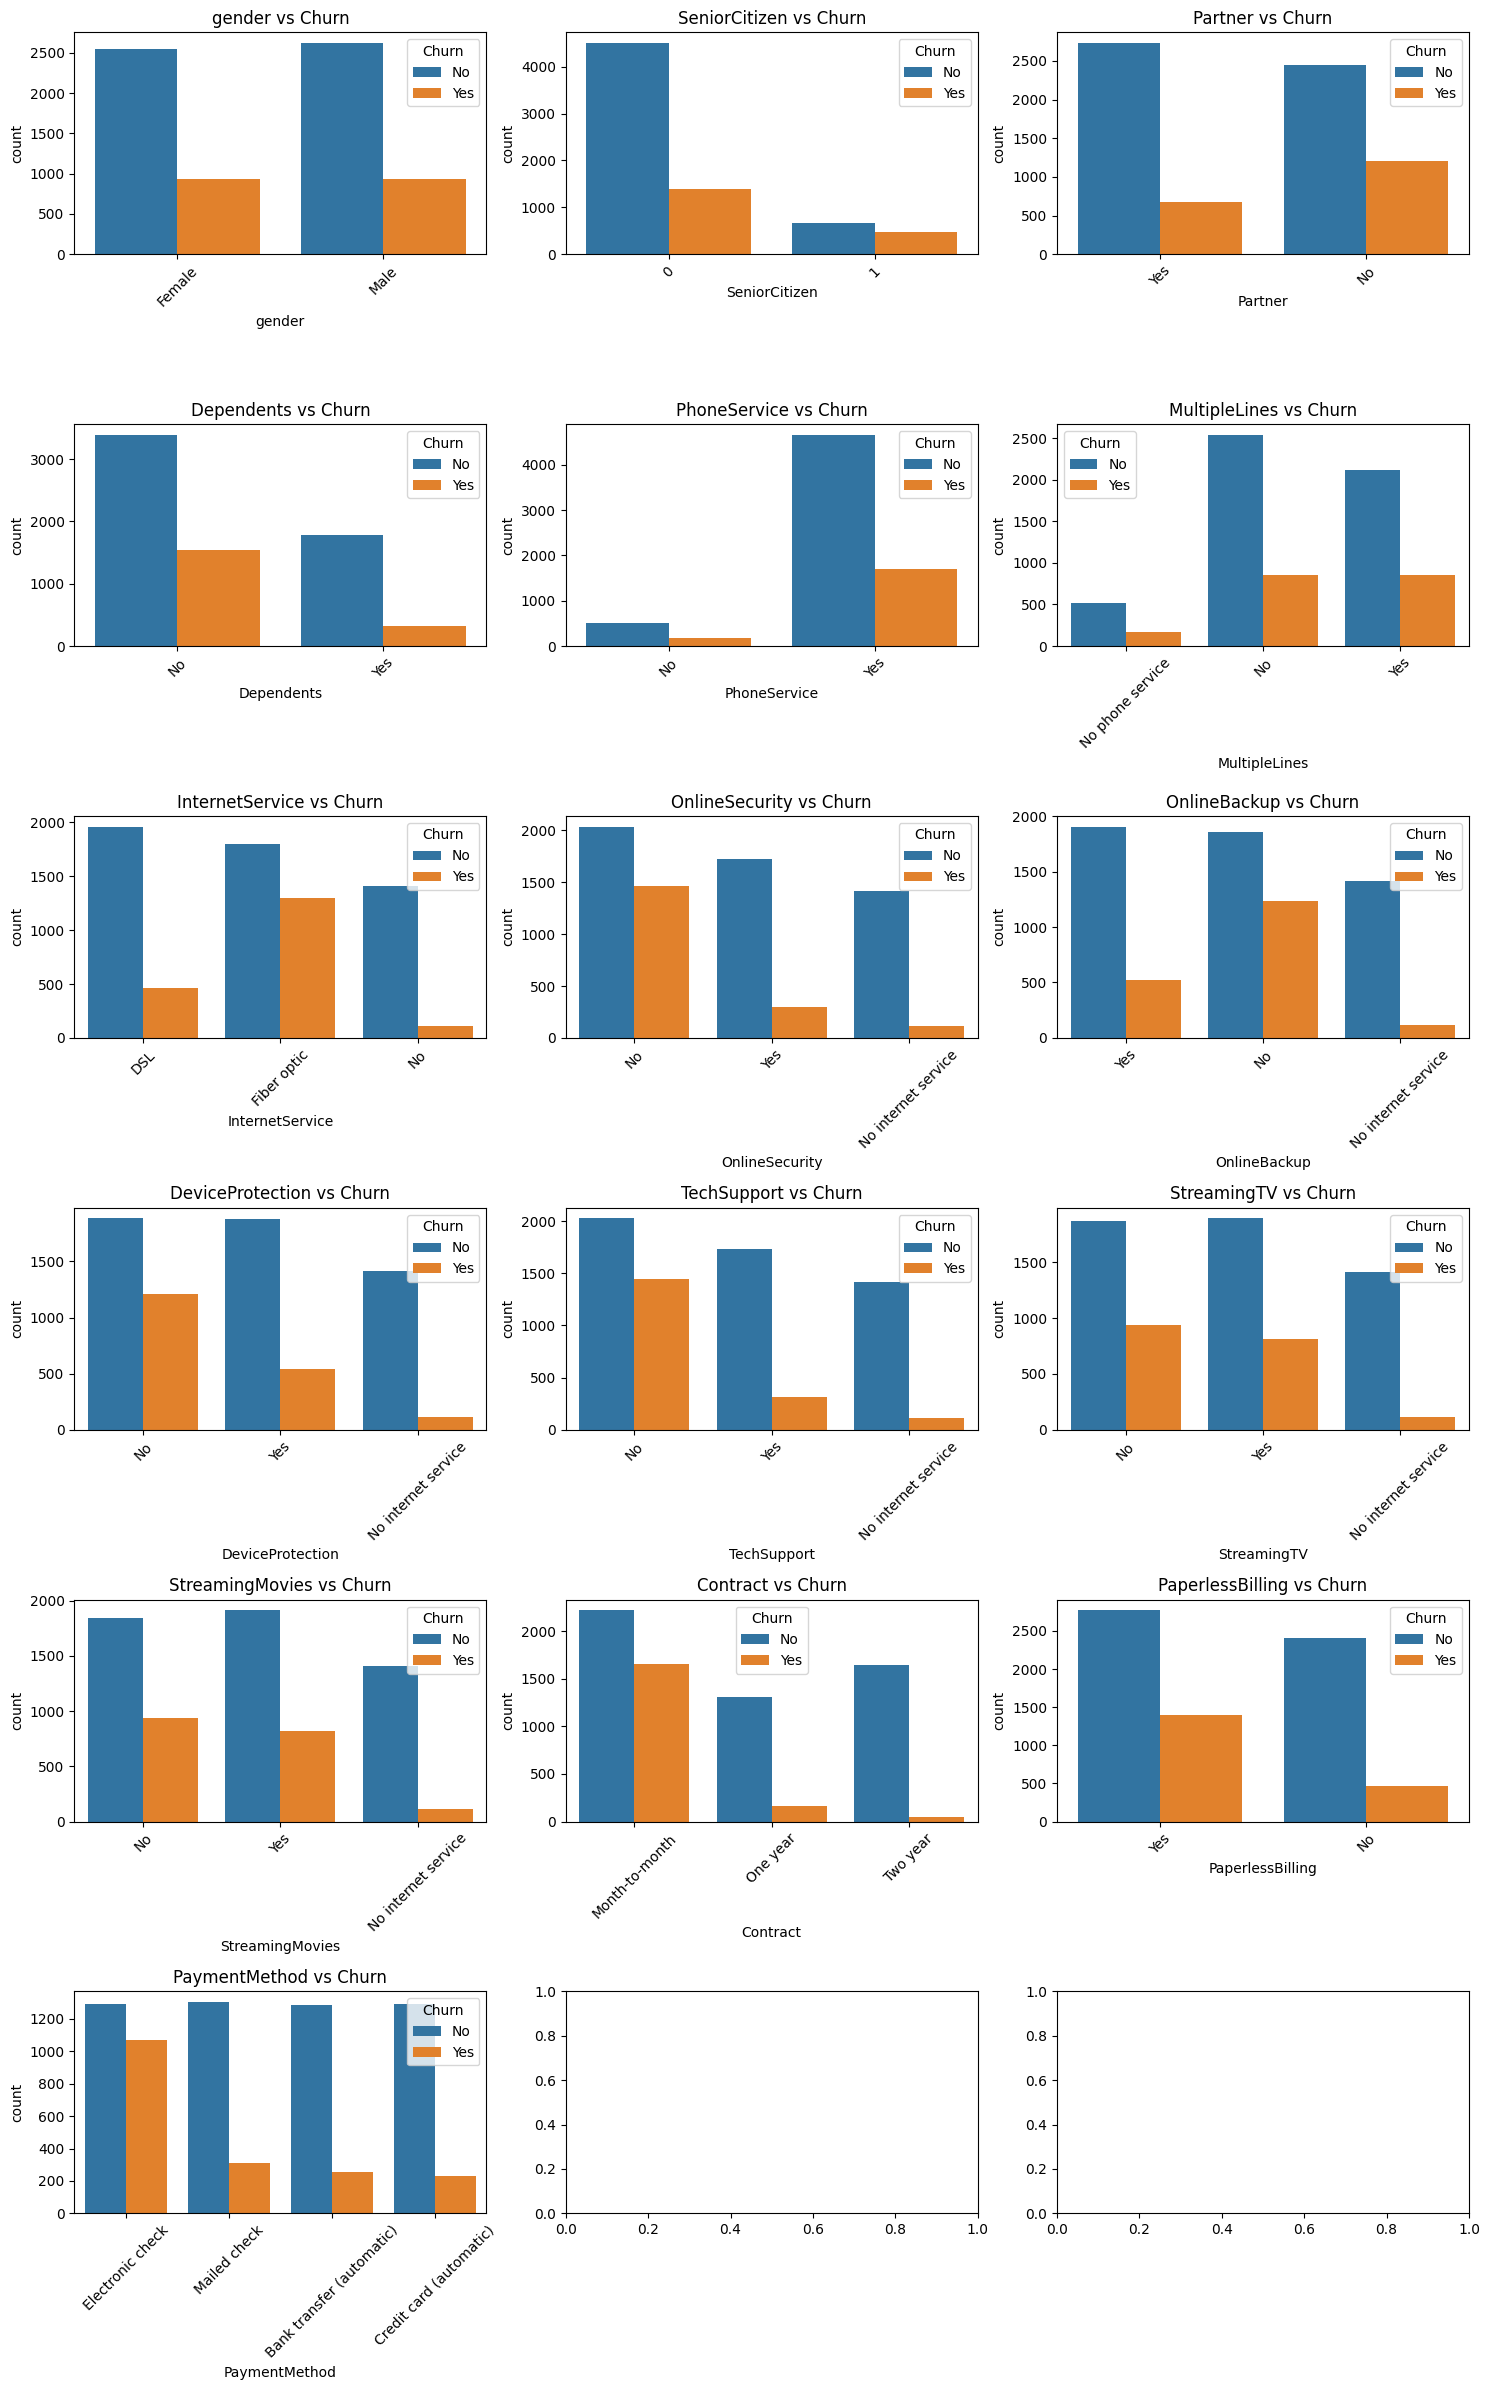

In [41]:
cat_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
                'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                'Contract','PaperlessBilling','PaymentMethod']

# set up grid
n = len(cat_features)
rows = math.ceil(n/3)
fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))

for i, col in enumerate(cat_features):
    r, c = divmod(i, 3)
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[r][c])
    axes[r][c].set_title(f"{col} vs Churn")
    axes[r][c].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 7. Correlation Between Numerical Features (Multicollinearity Preview)

We compute correlations among numeric features to check for multicollinearity, which can negatively affect linear regression models. Highly correlated predictors may provide redundant information.  

Interpretation:  
- `TotalCharges` and `tenure` are strongly correlated
- `MonthlyCharges` is moderately correlated with `TotalCharges`
- Correlations with **Churn** are relatively weak individually, suggesting churn depends on multiple factors combined

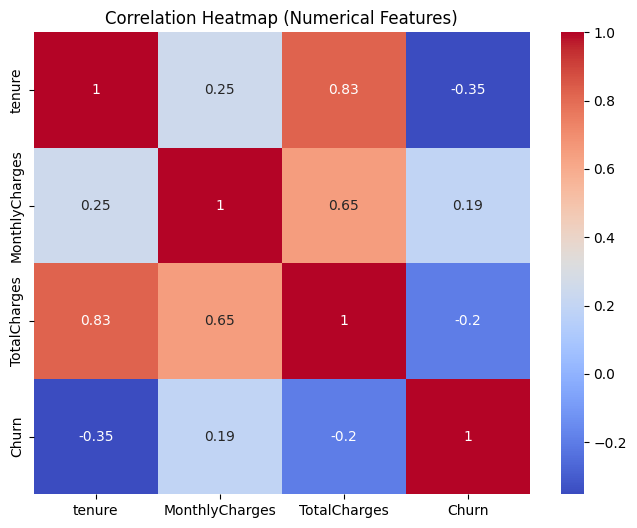

In [16]:
# correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[num_features + ['Churn']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

### 8. Outlier Detection (Preview)

In the EDA stage, we can only do a **basic check for extreme values** using boxplots and descriptive statistics.  
Formal influence diagnostics (Cook’s distance, studentized residuals, DFBETAS) will be applied later, after fitting regression models.

- **MonthlyCharges**: A few customers pay near the maximum (\$120+), which appear as high-end outliers.  
- **TotalCharges**: Some customers have very large totals (\$8,000–\$9,000+), reflecting long tenure and high monthly charges. These are valid but extreme.  
- **tenure**: No extreme outliers, naturally capped at 72 months.  

➡️ These preliminary checks suggest some extreme values exist, but further testing will determine if they unduly influence regression models.

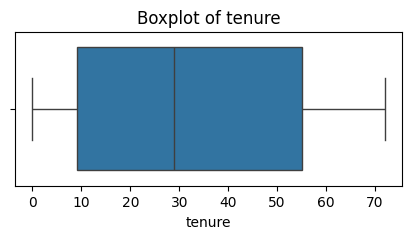

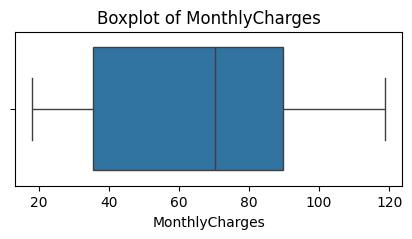

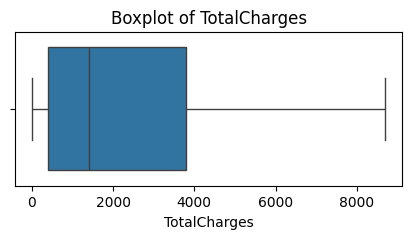

In [51]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_features:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### 9. Assumption Checks Summary

- **Linearity**: Tenure shows a likely non-linear relationship with churn. Logistic regression or GAM may be more appropriate.
- **Independence**: Customers are independent, so assumption holds.  
- **Homoscedasticity**: To be tested later using residuals.  
- **Normality**: Numeric features are skewed; residual normality to be tested later.  
- **Multicollinearity**: Some correlation between tenure, MonthlyCharges, and TotalCharges (check VIF later).  
- **Outliers**: Extreme values exist in MonthlyCharges and TotalCharges.  

➡️ We will revisit assumptions requiring residuals during model fitting (linear, logistic, GAM).

# Linear Regression
 We treated churn as a continuous variable (0 = no churn, 1 = churn) and fit a linear regression model to predict churn. We then interpreted the coefficients and assessed the model's performance.

TO EDIT!!!

**Performance:**
- R² Score: [your value] → very low, meaning the linear model explains little variance in churn.
- MSE: [your value].

**Coefficient interpretation:**
- Positive coefficients indicate features that increase churn probability:
  - Month-to-month contracts, electronic check payments, and fiber optic service.  
- Negative coefficients indicate features that reduce churn probability:
  - Two-year contracts, longer tenure, having dependents.  

**Residuals:**
- Residual plots show non-constant variance and patterns → violating linearity/homoscedasticity assumptions.  
- This confirms that plain linear regression is not a good fit for binary churn.  

➡️ Logistic regression (binary classification) or GAMs (for non-linear effects) are more appropriate.

### 1. Data Prep

In [54]:
# Drop customerID (not predictive)
df_model = df.drop(columns=['customerID'])

# Separate X (features) and y (target)
X = df_model.drop(columns=['Churn'])
y = df_model['Churn']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2. Define Evaluate Function

In [55]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Coefficients
    coef_df = pd.DataFrame({
        "Feature": X.columns,
        "Coefficient": model.coef_
    }).sort_values(by="Coefficient", key=abs, ascending=False)

    display(coef_df.head(10))  # show top 10 most important features

    return model, y_pred, coef_df

### 3. Fit Linear Regression Model

In [56]:
lr_model, lr_pred, coef_df = evaluate_model(
    LinearRegression(), X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression"
)



Linear Regression:
MSE: 0.1396
R² Score: 0.2839


,Feature,Coefficient
2,MonthlyCharges,-0.198179
10,InternetService_Fiber optic,0.184461
3,TotalCharges,-0.173851
23,StreamingMovies_Yes,0.067216
21,StreamingTV_Yes,0.065654
9,MultipleLines_Yes,0.051415
35,tenure_bin_61-72,0.051088
1,tenure,-0.049349
25,Contract_Two year,-0.045157
24,Contract_One year,-0.039943


### 4. Residuals + Actual vs. Predicted Plots

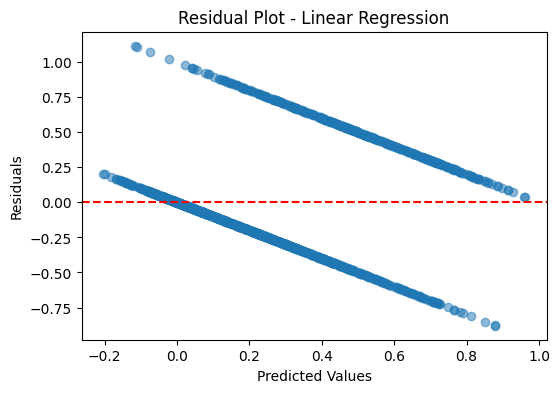

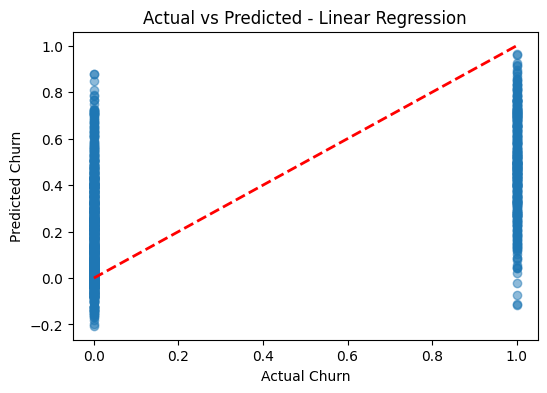

In [57]:
import matplotlib.pyplot as plt

def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot - {model_name}")
    plt.show()

def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([0,1], [0,1], 'r--', lw=2)  # perfect prediction line
    plt.xlabel("Actual Churn")
    plt.ylabel("Predicted Churn")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.show()

plot_residuals(y_test, lr_pred, "Linear Regression")
plot_actual_vs_predicted(y_test, lr_pred, "Linear Regression")


### 5. Interpretation

#Logistic Regression
Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.

# Generalized Additive Model (GAM)
Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.

# Assumption Checks After Modeling

We’ll check:
- Linearity (residuals vs predicted, RESET test).
- Independence of observations (Durbin–Watson).
- Homoscedasticity (residual plots, Breusch–Pagan).
- Normality of residuals (histogram, Q–Q plot, Shapiro–Wilk, Jarque–Bera).
- Multicollinearity (VIF).
- Influential outliers (Cook’s distance).

In [ ]:
residuals = y_test - lr_pred

plt.figure(figsize=(6,4))
plt.scatter(lr_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Linearity & Homoscedasticity Check)")
plt.show()


# Model Comparison
Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.